In [1]:
import sys
import pandas as pd
import numpy as np

sys.path.append("../../..")

import lemur.datasets as lds
import lemur.plotters as lpl
import lemur.metrics as lem
import lemur.embedders as leb

In [68]:
hbn = pd.read_csv("../../../../DMZ/hbn.csv", dtype="unicode")
columns = []
dx_columns = []
for c in hbn.columns:
    for i in range(1,10 + 1):
        if c == "ConsensusDx,DX_%02d"%i:
            #print("ConsensusDx,DX_%02d"%i)
            dx_columns.append(c)
        
dx = hbn[dx_columns]
dx = dx.replace("NaN", ".")
dx = dx.replace("n/a", ".")
dx = dx.fillna(".")
dx = dx.replace("No Diagnosis given", ".")
dx = dx.replace("No Diagnosis Given", ".")
dx = dx.replace("nan", ".")
no_dx = dx[dx.columns[0]] == "."
hbn = hbn[~no_dx]
dx = dx[~no_dx]
dx_count = (dx != ".").sum(axis=1).as_matrix()

for c in hbn.columns:
    #if c.endswith("Total") or c.endswith("Score") or c == "Identifiers" or c == "ConsensusDx,DX_01":
    if '"' not in c:
        columns.append(c)
hbn = hbn[columns]

hbn.to_csv("../../../../DMZ/hbn_cleaned.csv")

In [69]:
idx_columns = [("Identifiers",), ("ConsensusDx", "DX_01")]

CDS = lds.CSVDataSet("../../../../DMZ/hbn_cleaned.csv",
                     index_columns = idx_columns,
                     column_level_names = ("Instrument", "Variable"),
                     row_level_names = ("ID", "Diagnosis"),
                     name = "HBN Phenotypic")
CDS.imputeColumns("mean")
CDS.D

[ True  True  True ...,  True  True False]


Instrument                                                                       ACE  \
Variable                                                                      ACE_01   
ID                      Diagnosis                                                      
NDARAA117NEJ,assessment ADHD-Combined Type                                  0.333333   
NDARAA536PTU,assessment ADHD-Inattentive Type                               0.333333   
NDARAB793GL3,assessment Disruptive Mood Dysregulation Disorder              0.333333   
NDARAD481FXF,assessment Major Depressive Disorder                           0.333333   
NDARAE199TDD,assessment Other Specified Attention-Deficit/Hyperactivity...  0.333333   
NDARAE264WPZ,assessment Social Anxiety (Social Phobia)                      0.333333   
NDARAG139HKA,assessment ADHD-Combined Type                                  0.333333   
NDARAG143ARJ,assessment ADHD-Combined Type                                  0.333333   
NDARAJ366ZFA,assessment ADHD-Combined Type                                  0.333333   
NDARAJ807UYR,assessment ADHD-Combined Type                                  0.333333   
NDARAK187ZLP,assessment Autism Spectrum Disorder                            0.333333   
NDARAK653RYE,assessment Specific Phobia                                     0.333333   
NDARAM048AFP,assessment ADHD-Combined Type                                  0.333333   
NDARAM704GKZ,assessment Autism Spectrum Disorder                            0.333333   
NDARAN461TGQ,assessment ADHD-Inattentive Type                               0.333333   
NDARAN814UPR,assessment ADHD-Hyperactive/Impulsive Type                     0.333333   
NDARAP176AD1,assessment ADHD-Combined Type                                  0.333333   
NDARAP359UM6,assessment ADHD-Inattentive Type                               0.333333   
NDARAR025WX4,assessment Disruptive Mood Dysregulation Disorder              0.333333   
NDARAT299YRR,assessment ADHD-Combined Type                                  0.333333   
NDARAV534CJH,assessment Social Anxiety (Social Phobia)                      0.333333   
NDARAV747WVL,assessment Specific Learning Disorder with Impairment in M...  0.333333   
NDARAV894XWD,assessment ADHD-Combined Type                                  0.333333   
NDARAV945MCQ,assessment Cannabis Use Disorder                               0.333333   
NDARAW320CGR,assessment ADHD-Combined Type                                  0.333333   
NDARAX573RMT,assessment ADHD-Inattentive Type                               0.333333   
NDARAY238DFL,assessment ADHD-Combined Type                                  0.333333   
NDARAY734WB0,assessment Persistent Depressive Disorder (Dysthymia)          0.333333   
NDARBA507GCT,assessment Other Specified Anxiety Disorder                    0.333333   
NDARBA680RFY,assessment Autism Spectrum Disorder                            0.333333   
...                                                                              ...   
NDARMH677JDM,assessment ADHD-Hyperactive/Impulsive Type                     0.333333   
NDARMM878ZR1,assessment ADHD-Combined Type                                  0.333333   
NDARNF994TPA,assessment Oppositional Defiant Disorder                       0.333333   
NDARPD439RPL,assessment ADHD-Combined Type                                  0.333333   
NDARPK339NA6,assessment Tourettes Disorder                                  0.333333   
NDARRU501YED,assessment Autism Spectrum Disorder                            0.333333   
NDARTB329GFY,assessment Language Disorder                                   0.333333   
NDARTR811WH9,assessment Gender Dysphoria in Children                        0.333333   
NDARTT242GNN,assessment Oppositional Defiant Disorder                       0.333333   
NDARUV753MY9,assessment Specific Learning Disorder with Impairment in M...  0.333333   
NDARUZ807GNL,assessment ADHD-Combined Type                                  0.333333   
NDARVD547NLC,assessment ADHD-Hyperactive

In [70]:
num_in_col = [any(char.isdigit() for char in x) for x in CDS.D.columns.get_level_values("Variable")]
print(num_in_col)
CDS.D = CDS.D[CDS.D.columns[num_in_col]]
CDS.D

[True, True, True, True, True, True, True, True, True, True, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, False, False, False, False, True, True, True, True, True, True, True, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, 

Instrument                                                                       ACE  \
Variable                                                                      ACE_01   
ID                      Diagnosis                                                      
NDARAA117NEJ,assessment ADHD-Combined Type                                  0.333333   
NDARAA536PTU,assessment ADHD-Inattentive Type                               0.333333   
NDARAB793GL3,assessment Disruptive Mood Dysregulation Disorder              0.333333   
NDARAD481FXF,assessment Major Depressive Disorder                           0.333333   
NDARAE199TDD,assessment Other Specified Attention-Deficit/Hyperactivity...  0.333333   
NDARAE264WPZ,assessment Social Anxiety (Social Phobia)                      0.333333   
NDARAG139HKA,assessment ADHD-Combined Type                                  0.333333   
NDARAG143ARJ,assessment ADHD-Combined Type                                  0.333333   
NDARAJ366ZFA,assessment ADHD-Combined Type                                  0.333333   
NDARAJ807UYR,assessment ADHD-Combined Type                                  0.333333   
NDARAK187ZLP,assessment Autism Spectrum Disorder                            0.333333   
NDARAK653RYE,assessment Specific Phobia                                     0.333333   
NDARAM048AFP,assessment ADHD-Combined Type                                  0.333333   
NDARAM704GKZ,assessment Autism Spectrum Disorder                            0.333333   
NDARAN461TGQ,assessment ADHD-Inattentive Type                               0.333333   
NDARAN814UPR,assessment ADHD-Hyperactive/Impulsive Type                     0.333333   
NDARAP176AD1,assessment ADHD-Combined Type                                  0.333333   
NDARAP359UM6,assessment ADHD-Inattentive Type                               0.333333   
NDARAR025WX4,assessment Disruptive Mood Dysregulation Disorder              0.333333   
NDARAT299YRR,assessment ADHD-Combined Type                                  0.333333   
NDARAV534CJH,assessment Social Anxiety (Social Phobia)                      0.333333   
NDARAV747WVL,assessment Specific Learning Disorder with Impairment in M...  0.333333   
NDARAV894XWD,assessment ADHD-Combined Type                                  0.333333   
NDARAV945MCQ,assessment Cannabis Use Disorder                               0.333333   
NDARAW320CGR,assessment ADHD-Combined Type                                  0.333333   
NDARAX573RMT,assessment ADHD-Inattentive Type                               0.333333   
NDARAY238DFL,assessment ADHD-Combined Type                                  0.333333   
NDARAY734WB0,assessment Persistent Depressive Disorder (Dysthymia)          0.333333   
NDARBA507GCT,assessment Other Specified Anxiety Disorder                    0.333333   
NDARBA680RFY,assessment Autism Spectrum Disorder                            0.333333   
...                                                                              ...   
NDARMH677JDM,assessment ADHD-Hyperactive/Impulsive Type                     0.333333   
NDARMM878ZR1,assessment ADHD-Combined Type                                  0.333333   
NDARNF994TPA,assessment Oppositional Defiant Disorder                       0.333333   
NDARPD439RPL,assessment ADHD-Combined Type                                  0.333333   
NDARPK339NA6,assessment Tourettes Disorder                                  0.333333   
NDARRU501YED,assessment Autism Spectrum Disorder                            0.333333   
NDARTB329GFY,assessment Language Disorder                                   0.333333   
NDARTR811WH9,assessment Gender Dysphoria in Children                        0.333333   
NDARTT242GNN,assessment Oppositional Defiant Disorder                       0.333333   
NDARUV753MY9,assessment Specific Learning Disorder with Impairment in M...  0.333333   
NDARUZ807GNL,assessment ADHD-Combined Type                                  0.333333   
NDARVD547NLC,assessment ADHD-Hyperactive

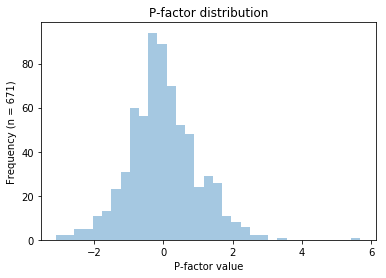

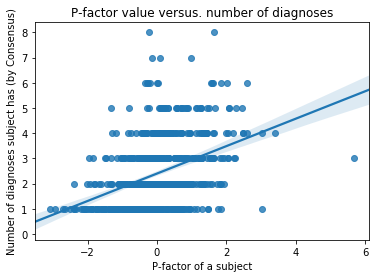

[[ 1.          0.40588173]
 [ 0.40588173  1.        ]]


In [76]:
from sklearn.decomposition import FactorAnalysis as FA
import seaborn as sns
import matplotlib.pyplot as plt
d = CDS.D.as_matrix()
fa = FA(n_components=1)
p = fa.fit(d).transform(d)
sns.distplot(p, kde=False)
plt.title("P-factor distribution")
plt.xlabel("P-factor value")
plt.ylabel("Frequency (n = %d)"%len(p))
plt.show()
sns.regplot(p, dx_count)
plt.title("P-factor value versus. number of diagnoses")
plt.xlabel("P-factor of a subject")
plt.ylabel("Number of diagnoses subject has (by Consensus)")
plt.show()
print(np.corrcoef(p.flatten(), dx_count.flatten()))

In [ ]:
dm = lds.DistanceMatrix(CDS, lem.VectorDifferenceNorm)
print(dm.labels)
print(dm.label_name)
lpl.DistanceMatrixHeatmap(dm, mode="html").plot()

In [ ]:
emp = lpl.Embedding2DScatter(dm, mode="html")
emp.label_name = "DX"
emp.label = label
emp.plot(leb.MDSEmbedder(3))

In [ ]:
lpl.ColumnNADistPlotter(CDS, mode="html").plot(0)

In [ ]:
lpl.EverythingPlotter(CDS).plot("hbn", lpl.ColumnDistributionPlotter)
lpl.EverythingPlotter(CDS).plot("hbn", lpl.ColumnNADistPlotter)

In [ ]:
import os
from openpyxl import load_workbook
def xlsxToHTML(frompath, topath):
    workbook = load_workbook(frompath + '.xlsx')
    worksheet = workbook.get_active_sheet()

    html_data = """
    <html>
        <head>
            <title>
            %s
            </title>
            <link rel="stylesheet"
                  href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css"
                  integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u"
                  crossorigin="anonymous">
        </head>
        <body>
            <h3>
            %s
            <h3>
        <table class='table'>
    """ % (worksheet['A1'].value, worksheet['A1'].value)
    first = False
    for row in worksheet:
        if first == False:
            first = True
            continue
        html_data += "      <tr>\n"
        for cell in row:
            if cell.value is None:
                html_data += '            <td>' + ' ' + '</td>\n'
            else:
                html_data += '            <td>' + str(cell.value) + '</td>\n'
        html_data += '    </tr>\n'
    html_data += "</table></body></html>"

    with open(topath + ".html", "w") as html_fil:
        html_fil.write(html_data)

In [ ]:
frombase = '../../../../DMZ/descriptions'
tobase = 'hbn'
import numpy as np
tests = np.unique(list(map(lambda x: x[0], CDS.D.columns.values)))
for t in tests:
    try:
        xlsxToHTML(os.path.join(frombase, t), os.path.join(tobase, t, t))
    except:
        print("No info for", t)